In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import em_stoch_lib

In [2]:
DIST_RATIO = 0.5

In [3]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1_rad = [0.1] # Направление прибытия (DOA) в радианах
theta1_deg = np.rad2deg(theta1_rad[0]) # Направление прибытия (DOA) в градусах
P_1 = 1 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация шума
Q_1 = 1.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1_rad)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
S1 = em_second_lib.gss(Num_emitters1, sample_size1, P_1)
n1 = em_second_lib.gss(Num_sensors1, sample_size1, Q_1)
X1 = (A1 @ S1.T + n1.T).T

In [4]:
X1_with_mv = em_second_lib.MCAR(X1, [2,4], [40, 40])

In [5]:
theta_list1 = np.linspace(-np.pi/2, np.pi/2, 181)
P_cov1 = {}
lkhd1 = {}

In [6]:
theta_list2 = np.linspace(theta1_rad[0]-0.1, theta1_rad[0]+0.1, 151)
P_cov2 = {}
lkhd2 = {}

In [7]:
for theta in theta_list1:
    P_cov1[theta], lkhd1[theta] = em_second_lib.multi_start_EM(theta, X1_with_mv, 1, Q_1, 1, max_iter=20, eps=1e-6)

0-th start
Initial theta = -1.5707963267948966
likelihood is -1014.8956181360002 on iteration 0
likelihood is -994.6500355215221 on iteration 1
likelihood is -987.9419951046173 on iteration 2
likelihood is -984.7458535997904 on iteration 3
likelihood is -982.8503001446511 on iteration 4
likelihood is -981.5591886652063 on iteration 5
likelihood is -980.6006110859427 on iteration 6
likelihood is -979.850468753449 on iteration 7
likelihood is -979.2438342609222 on iteration 8
likelihood is -978.7423665327464 on iteration 9
likelihood is -978.3211372636324 on iteration 10
likelihood is -977.96277835885 on iteration 11
likelihood is -977.6546104596042 on iteration 12
likelihood is -977.3870861619723 on iteration 13
likelihood is -977.1528635525376 on iteration 14
likelihood is -976.9462100019293 on iteration 15
likelihood is -976.762595255248 on iteration 16
likelihood is -976.5984022076141 on iteration 17
likelihood is -976.450715736051 on iteration 18
likelihood is -976.3171657520965 on 

In [8]:
x1 = list(lkhd1.keys())
y1 = list(lkhd1.values())

In [9]:
for theta in theta_list2:
    P_cov2[theta], lkhd2[theta] = em_second_lib.multi_start_EM(theta, X1_with_mv, 1, Q_1, 1, max_iter=20, eps=1e-6)

0-th start
Initial theta = 0.0
likelihood is -751.5720048991448 on iteration 0
likelihood is -744.7992478401858 on iteration 1
likelihood is -743.5823201898068 on iteration 2
likelihood is -743.4144923603009 on iteration 3
likelihood is -743.4982219431753 on iteration 4
likelihood is -743.6239292942956 on iteration 5
likelihood is -743.7326477734663 on iteration 6
likelihood is -743.8141434675168 on iteration 7
likelihood is -743.87229720951 on iteration 8
likelihood is -743.913332122869 on iteration 9
likelihood is -743.9425245659899 on iteration 10
likelihood is -743.9636841149071 on iteration 11
likelihood is -743.9793876109422 on iteration 12
likelihood is -743.9913303448033 on iteration 13
likelihood is -744.0006197833111 on iteration 14
likelihood is -744.0079845622819 on iteration 15
likelihood is -744.0139127183985 on iteration 16
likelihood is -744.0187396736386 on iteration 17
likelihood is -744.0227031169468 on iteration 18
likelihood is -744.0259769573352 on iteration 19
0-

In [10]:
x2 = list(lkhd2.keys())
y2 = list(lkhd2.values())

In [11]:
# ESPRIT
th1, P1= em_second_lib.ESPRIT_spectrum(X1, 1, -np.pi/2, np.pi/2, num_points=181)

In [12]:
# ESPRIT
th2, P2= em_second_lib.ESPRIT_spectrum(X1, 1, theta1_rad[0]-0.1, theta1_rad[0]+0.1, num_points=151)

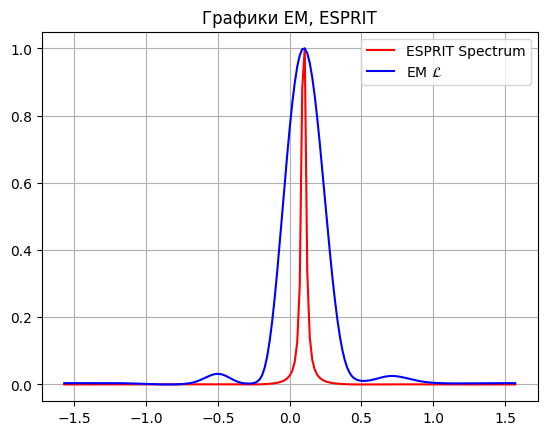

In [13]:
plt.plot(x1, em_second_lib.normalization(P1), color='red', label='ESPRIT Spectrum')
plt.plot(x1, em_second_lib.normalization(y1), color='blue', label=r'EM $\mathcal{L}$')
plt.title('Графики EM, ESPRIT')
plt.grid() 
plt.legend() 
plt.show()

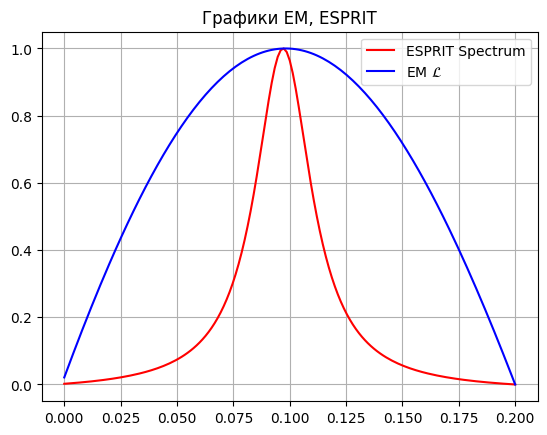

In [14]:
plt.plot(x2, em_second_lib.normalization(P2), color='red', label='ESPRIT Spectrum')
plt.plot(x2, em_second_lib.normalization(y2), color='blue', label=r'EM $\mathcal{L}$')
plt.title('Графики EM, ESPRIT')
plt.grid() 
plt.legend() 
plt.show()